<a href="https://colab.research.google.com/github/shweta1290/pytorch/blob/main/PyTorch_COmputer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer vision libraries
* torchvision
* torchvision.datasets
* torchvision.models
* torchvision.transform
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(torchvision.__version__)


0.18.0+cu121


## Fashion MNIST Dataset


In [ ]:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",#where to download the data
    train=True ,# we want training dataset
    download=True,#download the dataset
    transform=torchvision.transforms.ToTensor(),#how  do we want to transform data
    target_transform=None #how do we transform labels

)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)



100%|██████████| 26421880/26421880 [00:02<00:00, 10951744.94it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201441.53it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1927501.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4977472.80it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

##  Visualizing

image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

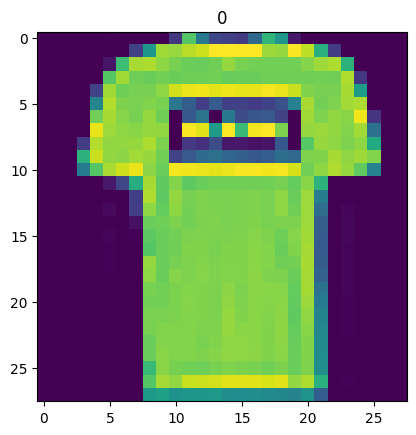

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[1]
print(f"image shape:{image.shape}")
plt.imshow(image.squeeze())
# need to add squeeze as totensor transforms image in dimension such tha color channel is first we get rid of the extra dimension by squeeze
plt.title(label)

plot grayscale images

Text(0.5, 1.0, 'T-shirt/top')

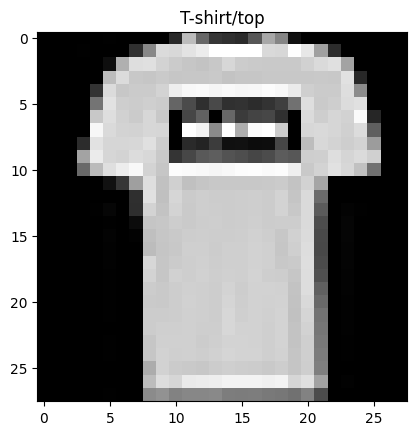

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])


## prepare dataloader
our data is in form of Pytorch dataset
Dataloader turns our data into a Python iterable


More specifically we want to turn data into batches

In [ ]:
from torch.utils.data import DataLoader
batch_size=32
train_dataloader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_dataloader=DataLoader(train_data,batch_size=batch_size,shuffle=False)

In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### Creating a Model

In [ ]:
# creating a flatten layer
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
output.size()

torch.Size([1, 784])

In [ ]:
from torch import nn
class FashionMNIST(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape))
  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)
model0=FashionMNIST(input_shape=784,hidden_units=10,output_shape=len(class_names))
model0

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#dummy forward pass
dummy_x=torch.rand(1,1,28,28)
model0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
#setupa loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [ ]:
# prompt: install torchmetrics

!pip install torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from torchmetrics import Accuracy
accuracy_fn=Accuracy(task="multiclass",num_classes=len(class_names))


## Creating a function to time our module

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float):
  print(f"Train time:{end-start:.3f} seconds")
  print(f"Time per batch:{(end-start)/32}")

### Creating a train loop
* Loop through epochs
* Loop thru train batches,perform train setps,calculate the train loss per batch
* Loop thru testing batches,perform test steps,calculate the loass per batch
* print whats happening
* Time it all

In [ ]:
#import tqdm progress bart
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start=timer()
epoch=3
for epoch in tqdm(range(epoch)):
  print(f"Epoch:{epoch}")
  ### Training
  train_loss=0
  for batch,(x,y) in enumerate(train_dataloader):
    model0.train()
    y_pred=model0(x)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"loss:{loss:.5f}")
  train_loss/=len(train_dataloader)

  # Testing loss
  test_loss=0
  test_acc=0
  model0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred=model0(x_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(test_pred.argmax(dim=1),y_test)
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
    print(f"Test loss:{test_loss:.5f},Test acc:{test_acc:.2f}")

  train_data_time_end=timer()
  print_train_time(train_time_start,train_data_time_end)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
loss:2.36648
loss:0.64239
loss:0.56967
loss:0.38129
loss:0.34903
Test loss:0.47426,Test acc:0.83
Train time:20.800 seconds
Time per batch:0.6499866121562512
Epoch:1
loss:0.37993
loss:0.68359
loss:0.38633
loss:0.64641
loss:0.26916
Test loss:0.43953,Test acc:0.85
Train time:41.244 seconds
Time per batch:1.2888781832812484
Epoch:2
loss:0.36814
loss:0.74372
loss:0.29380
loss:0.39590
loss:0.37834
Test loss:0.43026,Test acc:0.85
Train time:61.384 seconds
Time per batch:1.9182484765312537


### Make predictions and get results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  '''Retuurns a dictionary of model results'''
  loss=0
  acc=0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      y_pred=model(x)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_pred.argmax(dim=1),y)
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}
model0_results=eval_model(model0,test_dataloader,loss_fn,accuracy_fn)
model0_results

{'model_name': 'FashionMNIST',
 'model_loss': 0.4302613139152527,
 'model_acc': tensor(0.8494)}

In [ ]:
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"

## building a non-linear model

In [ ]:
class FashionMNIST2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU())
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)




In [ ]:
torch.manual_seed(41)
model1=FashionMNIST2(input_shape=784,hidden_units=10,output_shape=len(class_names))

In [ ]:
# create a loss function
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

## Functionizing trainig and evaluation/testing loops
* training loop-train_step()
* test loop-test_set()

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  model.train()
  for batch,(x,y) in enumerate(data_loader):
    x,y=x.to(device),y.to(device)
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_pred.argmax(dim=1),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"loss:{train_loss:.5f},Accuracy:{train_acc:.2f}")






In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  model.eval()
  test_loss,test_acc=0,0
  with torch.no_grad():
    for x,y in data_loader:
      x,y=x.to(device),y.to(device)
      test_pred=model(x)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(test_pred.argmax(dim=1),y)
    #adjust metrics
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:.5f},Test acc:{test_acc:.2f}")




In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
start_time=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_step(model=model1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(
      model=model1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )
  end_time=timer()
  print_train_time(start_time,end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
loss:0.62426,Accuracy:0.78
Test loss:0.49020,Test acc:0.82
Train time:22.740 seconds
Time per batch:0.7106385924062479
Epoch:1
loss:0.46521,Accuracy:0.84
Test loss:0.41782,Test acc:0.85
Train time:45.746 seconds
Time per batch:1.4295660707187494
Epoch:2
loss:0.43738,Accuracy:0.84
Test loss:0.42037,Test acc:0.85
Train time:68.784 seconds
Time per batch:2.149505830156251


In [ ]:
#get model1 results dicionary
model1_results=eval_model(model1,test_dataloader,loss_fn,accuracy_fn)
model1_results

{'model_name': 'FashionMNIST2',
 'model_loss': 0.42037197947502136,
 'model_acc': tensor(0.8519)}

### Building CNN

---
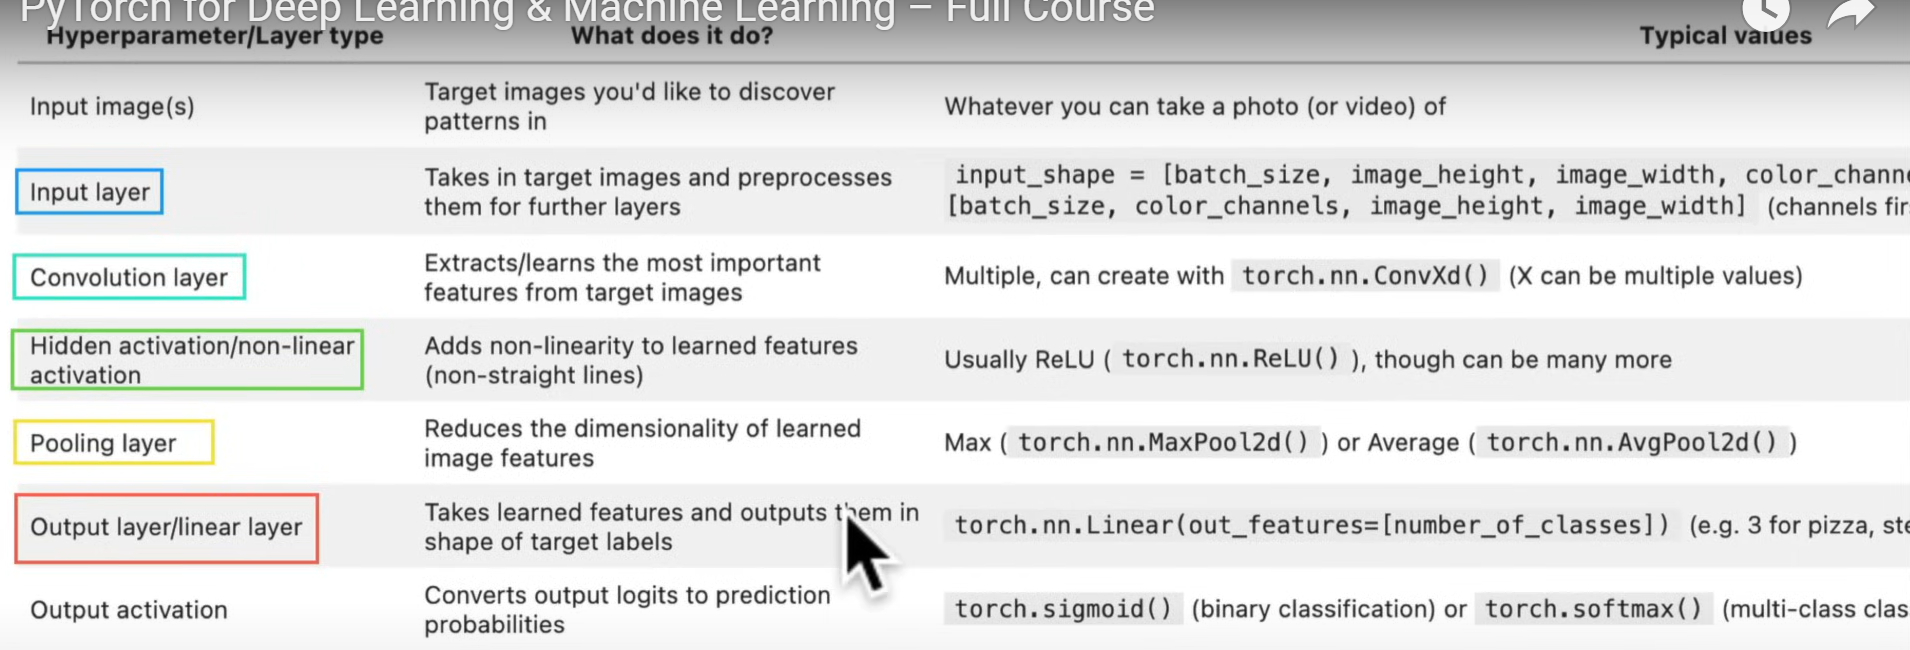



In [ ]:
class FashionMNISTCNN(nn.Module):
  def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    #replicating VGG tiny
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

        )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7 ,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x




In [ ]:
torch.manual_seed(42)
model3=FashionMNISTCNN(input_shape=1,
                    output_shape=len(class_names),
                    hidden_units=10)
model3

FashionMNISTCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#creating a demo image
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))#batch channel width heigh
test_image=images[0]
print(f"Image Shape {images.shape}")
print(f"Test Image {test_image}")

Image Shape torch.Size([32, 3, 64, 64])
Test Image tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0

In [ ]:

conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,padding=0)

In [ ]:

torch.manual_seed(42)
conv_output=conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

### setup losss fn and optimizer

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model3.parameters(),lr=0.1)

In [ ]:
model3.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
### training and testing
torch.manual_seed(42)
from timeit import default_timer as timer
start_time=timer()
epochs=3
for epoc in tqdm(range(epochs)):
  print(f"Epoch: {epoc}")
  train_step(model=model3,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model3,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
  print(f"Time taken: {timer()-start_time}")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
loss:0.59518,Accuracy:0.78
Test loss:0.37069,Test acc:0.87
Time taken: 91.52435612
Epoch: 1
loss:0.36536,Accuracy:0.87
Test loss:0.31934,Test acc:0.88
Time taken: 179.50947535599994
Epoch: 2
loss:0.32588,Accuracy:0.88
Test loss:0.29783,Test acc:0.90
Time taken: 268.3371303470001


In [ ]:
model3_results=eval_model(
    model=model3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model3_results,model1_results


({'model_name': 'FashionMNISTCNN',
  'model_loss': 0.297833114862442,
  'model_acc': tensor(0.8955)},
 {'model_name': 'FashionMNIST2',
  'model_loss': 0.42037197947502136,
  'model_acc': tensor(0.8519)})

### Compare model results and time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model3_results,model1_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTCNN,0.297833,tensor(0.8955)
1,FashionMNIST2,0.420372,tensor(0.8519)


In [ ]:
# compare_results = compare_results.set_index("model_name")

# # Now you can access 'model_acc' and plot
# compare_results["model_acc"].plot(kind="barh")
# plt.xlabel("accuracy")
# plt.ylabel("model")
# plt.show()

### confusion  matrix

In [ ]:
y,y_pred.argmax(dim=1)

(tensor([5, 1, 3, 8, 4, 7, 9, 2, 6, 9, 4, 3, 3, 4, 3, 3, 9, 1, 0, 3, 3, 8, 5, 5,
         0, 9, 3, 3, 9, 6, 2, 1]),
 tensor([5, 1, 6, 8, 4, 7, 9, 2, 6, 9, 4, 3, 3, 4, 3, 3, 9, 1, 0, 0, 3, 8, 5, 5,
         0, 9, 0, 3, 9, 4, 2, 1]))

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
cofmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
cofmat_tensor=cofmat(preds=y_pred.argmax(dim=1),target=y)



In [ ]:
cofmat_tensor

tensor([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 6, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

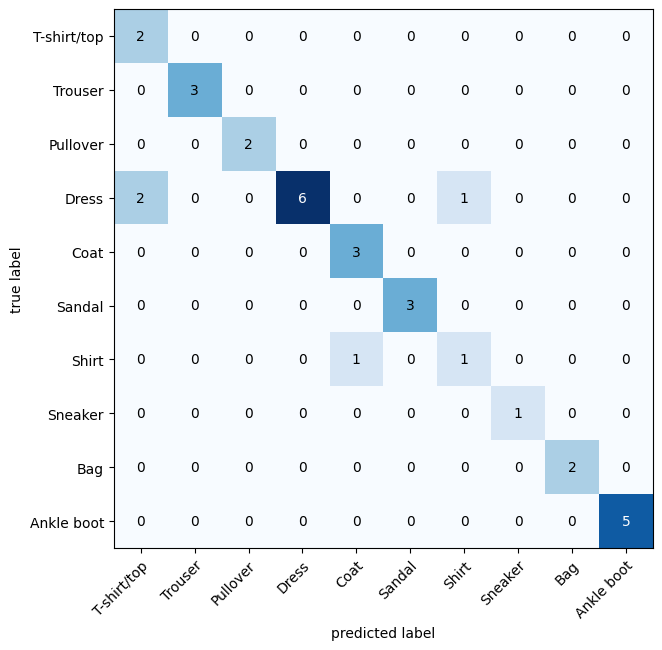

In [ ]:
fig,ax=plot_confusion_matrix(
    conf_mat=cofmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

### Save and load

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="ModelCNN.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model3.state_dict(),f=MODEL_SAVE_PATH)


In [ ]:
torch.manual_seed(42)
loaded_model=FashionMNISTCNN(input_shape=1,hidden_units=10,output_shape=len(class_names))
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model

FashionMNISTCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)